In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
%cd drive/My\ Drive/
%cd atml

/content/drive/My Drive
/content/drive/My Drive/atml


In [66]:
!git add --all
!git commit -m "Prepare metrics for custom noise models"
!git push


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@456fe7a73ca5.(none)')
Everything up-to-date


In [21]:
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import random

import os
import sys

module_path = os.path.abspath(os.path.join('..'))
abs_path = "/content/drive/MyDrive/atml"
sys.path.append(abs_path+"/datasets")

from datasets import load_dsprites, AddUniformNoise, AddGeneratedNoise, CustomDSpritesDataset, NoiseGeneratorNet
# from beta_vae import BetaVAEDSprites

# Fix seed 
torch.manual_seed(2)
random.seed(2)
np.random.seed(2)

In [7]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
device

device(type='cpu')

In [38]:
# transform = None
random_transform = AddUniformNoise(-.1, .1)
custom_transform = AddGeneratedNoise(abs_path + "/datasets/noisenet.pth", device)
dataset = CustomDSpritesDataset(load_dsprites(abs_path + "/datasets/dsprites.npz", False), )

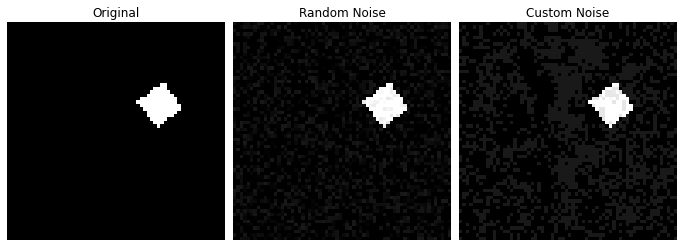

In [62]:
idx = 5000
org_img = dataset[idx]
custom_transformed_img = custom_transform(dataset[idx], dataset.retrieve_latent_values(dataset.latent_matrix[idx])).reshape(64, 64)
random_transformed_img = random_transform(dataset[idx])

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.subplots_adjust(hspace=.04, wspace=.04)
for ax, t, img in zip(axs, ['Original', 'Random Noise', 'Custom Noise'], [org_img, random_transformed_img, custom_transformed_img]):
    ax.imshow(img, cmap='gray')
    ax.set_title(t)
    ax.axis('off')

plt.savefig(abs_path + f"/datasets/{idx}_transformations.png", bbox_inches='tight')
plt.show()

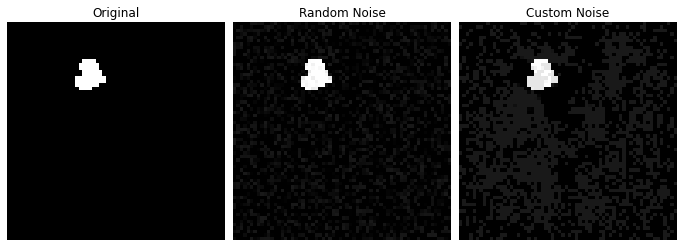

In [63]:
idx = 500000
org_img = dataset[idx]
custom_transformed_img = custom_transform(dataset[idx], dataset.retrieve_latent_values(dataset.latent_matrix[idx])).reshape(64, 64)
random_transformed_img = random_transform(dataset[idx])

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.subplots_adjust(hspace=.04, wspace=.04)
for ax, t, img in zip(axs, ['Original', 'Random Noise', 'Custom Noise'], [org_img, random_transformed_img, custom_transformed_img]):
    ax.imshow(img, cmap='gray')
    ax.set_title(t)
    ax.axis('off')

plt.savefig(abs_path + f"/datasets/{idx}_transformations.png", bbox_inches='tight')
plt.show()

In [ ]:
a = dataset.sample_latent(5)
a

array([[ 0.,  0.,  3., 21.,  7., 11.],
       [ 0.,  1.,  0., 31.,  3., 19.],
       [ 0.,  0.,  2., 26.,  6.,  7.],
       [ 0.,  2.,  1., 20.,  4.,  6.],
       [ 0.,  2.,  3., 37., 10., 10.]])

In [ ]:
b = dataset.latent_to_index(a)
b

array([144619, 277619, 108743, 553094, 652618])

In [ ]:
dataset.indices_to_latent(b)

array([[ 0.,  0.,  3., 21.,  7., 11.],
       [ 0.,  1.,  0., 31.,  3., 19.],
       [ 0.,  0.,  2., 26.,  6.,  7.],
       [ 0.,  2.,  1., 20.,  4.,  6.],
       [ 0.,  2.,  3., 37., 10., 10.]])